<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_08/Class_008_object_detection_001_Finding_Waldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

Cloning into 'Machine_Learning_DataSet'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 165 (delta 30), reused 56 (delta 20), pack-reused 75
Receiving objects: 100% (165/165), 58.28 MiB | 13.85 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/Machine_Learning_DataSet


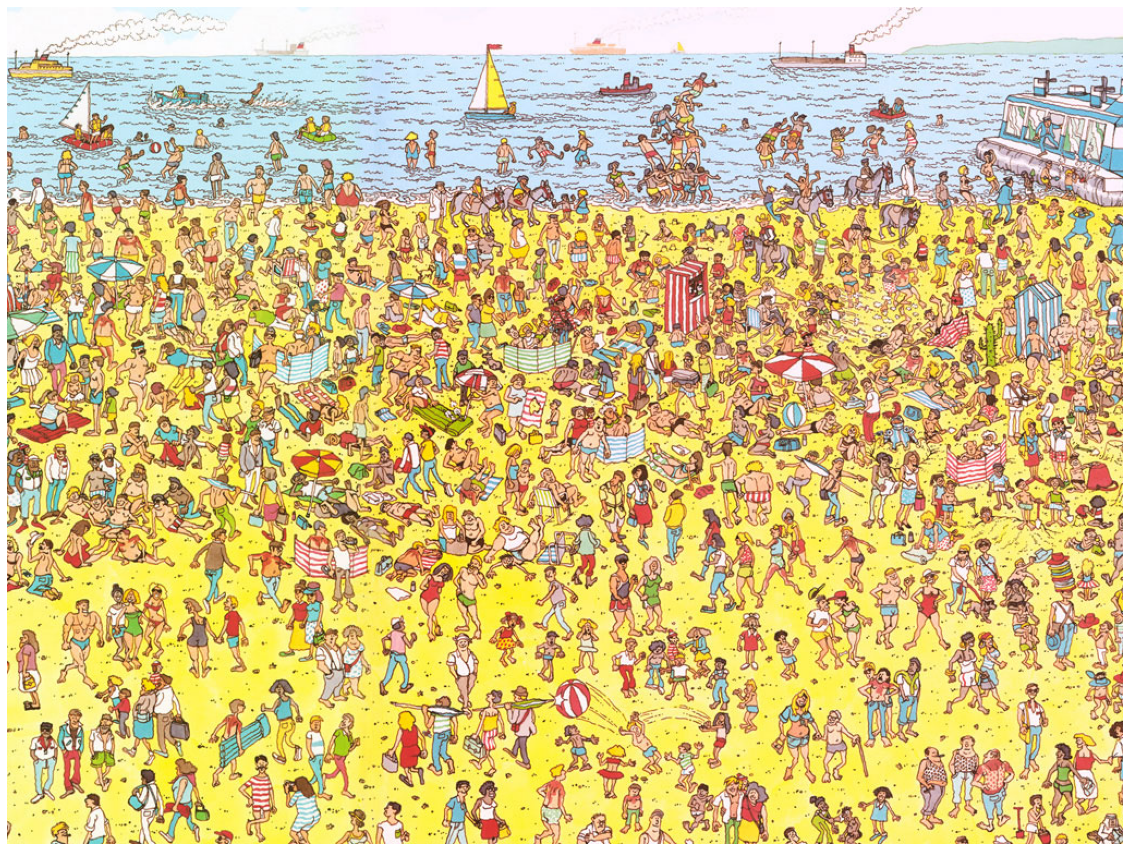

In [10]:
# Load input image and convert to grayscale

plt.figure(figsize=(20, 20))
image = cv2.imread('WaldoBeach.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis("off")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
# Load Template image
template = cv2.imread('waldo.jpg',0)


result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
plt.figure(figsize=(20, 20))
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
#plt.imshow(RGB_img)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)



array([[[255, 248, 231],
        [255, 249, 232],
        [255, 249, 232],
        ...,
        [255, 245, 255],
        [255, 245, 255],
        [255, 245, 255]],

       [[254, 245, 231],
        [255, 246, 232],
        [255, 246, 232],
        ...,
        [255, 245, 255],
        [255, 245, 255],
        [255, 245, 255]],

       [[253, 245, 232],
        [253, 245, 232],
        [253, 245, 232],
        ...,
        [255, 245, 255],
        [255, 245, 255],
        [255, 245, 255]],

       ...,

       [[158, 245, 249],
        [155, 246, 250],
        [146, 243, 247],
        ...,
        [182, 199, 202],
        [173, 199, 205],
        [ 93, 122, 131]],

       [[163, 253, 254],
        [158, 251, 252],
        [150, 250, 252],
        ...,
        [101, 132, 147],
        [ 79, 123, 147],
        [114, 165, 197]],

       [[159, 252, 251],
        [156, 252, 252],
        [153, 254, 255],
        ...,
        [  5,  46,  69],
        [105, 160, 199],
        [166, 232, 255]]

<Figure size 1440x1440 with 0 Axes>

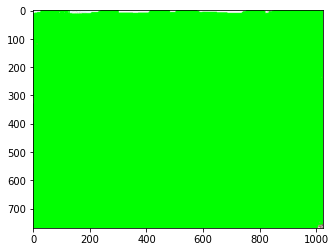

In [21]:
threshold = 0.8
w, h = template.shape[::-1]
# finding the values where it exceeds the threshold
loc = np.where( result  >= threshold)
for pt in zip(*loc[::-1]):
    #draw rectangle on places where it exceeds threshold
    cv2.rectangle(RGB_img, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)
plt.imshow(RGB_img)

In [17]:
min_val

-2278832.0

### Notes on Template Matching

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag **cv2.TM_CCOEFF.**

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are.
That’s really all there is to template matching!

http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      